<a href="https://colab.research.google.com/github/thach15/Spotify-Project/blob/main/%5BAM115%5D_PSET_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Create data path

In [37]:
# uncomment to clone gh repo easier access to data
!git clone https://github.com/fmottes/Harvard-AM115-2024.git

DATA_PATH = 'Harvard-AM115-2024/Data/'

fatal: destination path 'Harvard-AM115-2024' already exists and is not an empty directory.


In [38]:
import numpy as np
import scipy
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

##Problem 2

**2a**

In [39]:
from scipy.stats import pareto

In [40]:
n = 1000 # number of draws per trial
N = 10000 # number of trials


# n samples from gaussian, returns the max value
def top_pareto(n, b):
    return np.max(pareto.rvs(b, size=n))

# take max-of-n value for N times
pareto_extremes = np.array([top_pareto(n, 5) for _ in range(N)])

print(f'Avg. max value:\t\t{pareto_extremes.mean()}')
print(f'Standard deviation:\t{pareto_extremes.std()}')

Avg. max value:		4.644419736679601
Standard deviation:	1.4571192094485406


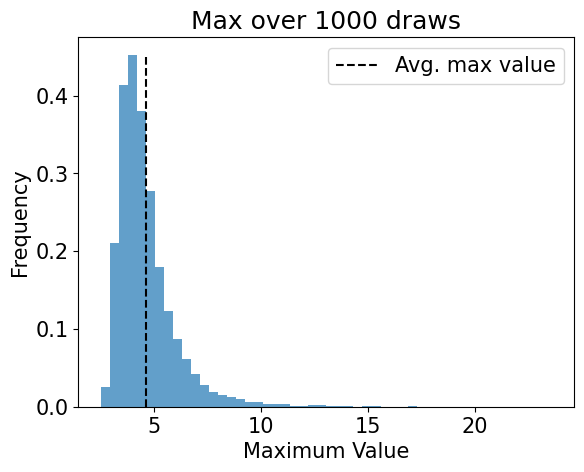

In [41]:
hist = plt.hist(pareto_extremes, bins=50, density=True, alpha=.7)

plt.vlines(pareto_extremes.mean(), 0, hist[0].max(), colors='k', linestyles='--', label='Avg. max value')

plt.xlabel('Maximum Value')
plt.ylabel('Frequency')
plt.title(f'Max over {n} draws')
plt.legend()
plt.show();

Let's try a poisson distribution with $\lambda = 5$.

In [42]:
n = 1000 # number of draws per trial
N = 10000 # number of trials


# n samples from gaussian, returns the max value
def top_poisson(lam, n):
    return np.max(np.random.poisson(lam, size=n))

# take max-of-n value for N times
poisson_extremes = np.array([top_poisson(5, n) for _ in range(N)])

print(f'Avg. max value:\t\t{poisson_extremes.mean()}')
print(f'Standard deviation:\t{poisson_extremes.std()}')

Avg. max value:		13.6709
Standard deviation:	1.1611172163050552


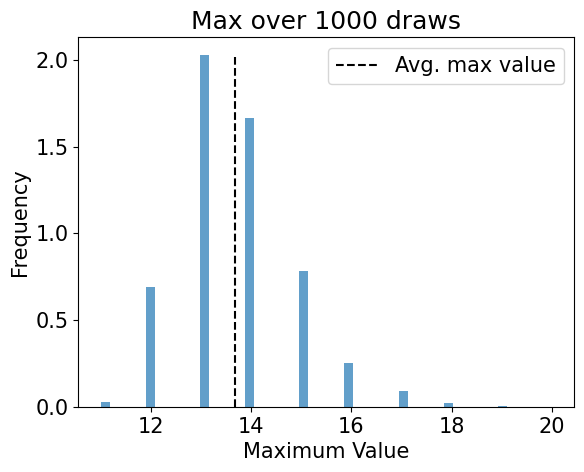

In [43]:
hist = plt.hist(poisson_extremes, bins=50, density=True, alpha=.7)

plt.vlines(poisson_extremes.mean(), 0, hist[0].max(), colors='k', linestyles='--', label='Avg. max value')

plt.xlabel('Maximum Value')
plt.ylabel('Frequency')
plt.title(f'Max over {n} draws')
plt.legend()
plt.show();

Let's determine if the powerlaw and poisson distribution maintain the universality property!

In [44]:
z_powerlaw = (pareto_extremes - pareto_extremes.mean())/pareto_extremes.std()

z_poisson = (poisson_extremes - poisson_extremes.mean())/poisson_extremes.std()

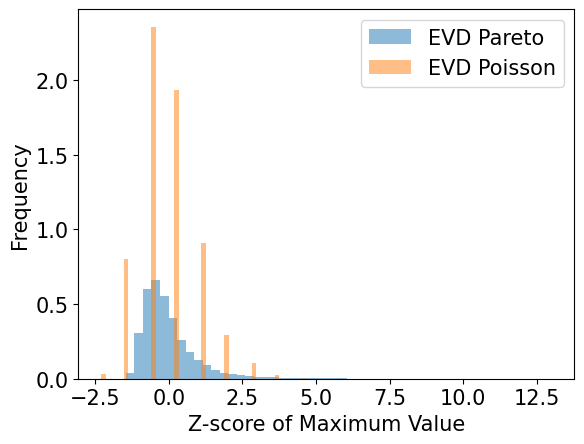

In [45]:
plt.hist(z_powerlaw, bins=50, density=True, alpha=.5, label='EVD Pareto')

plt.hist(z_poisson, bins=50, density=True, alpha=.5, label='EVD Poisson')

plt.xlabel('Z-score of Maximum Value')
plt.ylabel('Frequency')
plt.legend();

Since even after rescaling, we see that there is a common shape. This implies that they do maintain the universality principle discussed in lecture.

**2b**

In [46]:
# Load data
with open('Harvard-AM115-2024/Homework/HW2/HW2-100m_dash_history.csv', 'r') as fh:
    dash_history = pd.read_csv(fh)

In [47]:
dash_history = dash_history[dash_history['distance'] == '100']

In [48]:
def fit_pareto_distribution(data):
    """Fits Gumbel distribution to input data"""
    params = pareto.fit(data)
    return pareto(*params)

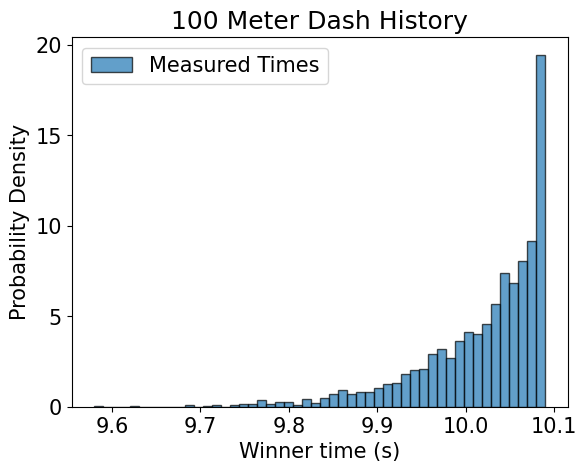

In [49]:
# Fit powerlaw distribution to the winning times (in seconds)
pareto_fit = fit_pareto_distribution(dash_history['time_seconds'])


# Plot the hist of the running times
plt.hist(dash_history['time_seconds'],
         bins=50,
         edgecolor='black',
         density=True,
         label="Measured Times", alpha=.7
         )


# Plot the fitted Gumbel distribution
# x_pareto = np.linspace(*pareto_fit.interval(0.9999), 300)
# plt.plot(x_pareto, pareto_fit.pdf(x_pareto), 'k', label='Pareto Fit')


plt.xlabel('Winner time (s)')
plt.ylabel('Probability Density')
plt.title('100 Meter Dash History')

plt.legend();

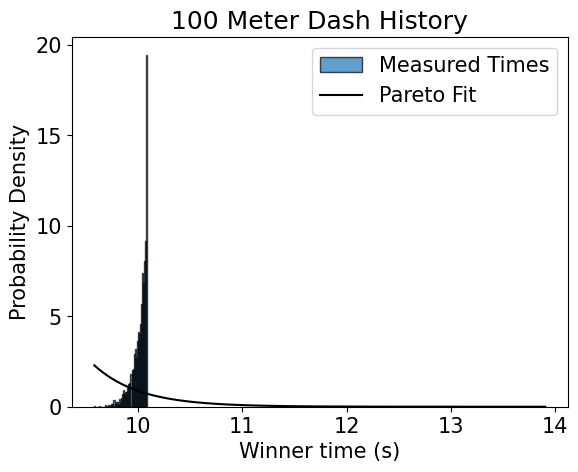

In [50]:
# Fit powerlaw distribution to the winning times (in seconds)
pareto_fit = fit_pareto_distribution(dash_history['time_seconds'])


# Plot the hist of the running times
plt.hist(dash_history['time_seconds'],
         bins=50,
         edgecolor='black',
         density=True,
         label="Measured Times", alpha=.7
         )


# Plot the fitted Gumbel distribution
x_pareto = np.linspace(*pareto_fit.interval(0.9999), 300)
plt.plot(x_pareto, pareto_fit.pdf(x_pareto), 'k', label='Pareto Fit')


plt.xlabel('Winner time (s)')
plt.ylabel('Probability Density')
plt.title('100 Meter Dash History')

plt.legend();

Comparing the distribution of the fastest times to the Pareto Law EVD, we see that it is a poor distribution to choose for the data as there is no alignment or agreement on a common shape/direction of the curve. One possible reason for this difference could be that the pareto does not take into account the features that draw the trend that we see in the distribution of the measured times.

**2c**: Now let's look at the times only for Usain Bolt!

In [51]:
usain_bolt_times = dash_history[dash_history['name'] == 'Usain Bolt']['time_seconds']
usain_bolt_times.head()

0     9.58
1     9.63
2     9.69
6     9.72
14    9.76
Name: time_seconds, dtype: float64

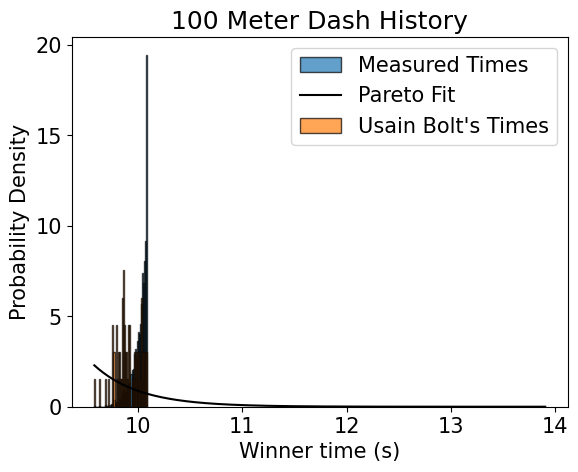

In [52]:
# Plot the hist of the running times
plt.hist(dash_history['time_seconds'],
         bins=50,
         edgecolor='black',
         density=True,
         label="Measured Times", alpha=.7
         )


# Plot the fitted Gumbel distribution
x_pareto = np.linspace(*pareto_fit.interval(0.9999), 300)
plt.plot(x_pareto, pareto_fit.pdf(x_pareto), 'k', label='Pareto Fit')

plt.hist(usain_bolt_times,
         bins=50,
         edgecolor='black',
         density=True,
         label="Usain Bolt's Times",
         alpha=0.7)


plt.xlabel('Winner time (s)')
plt.ylabel('Probability Density')
plt.title('100 Meter Dash History')

plt.legend();

We see that the distribution of Usain Bolt's times is not very similar to our EVD. If anything, it looks more like a bell curve than the powerlaw distribution curve that we see in blue and in black. This tells us that there is some feature or difference in Usain Bolt's data that is not well captured by our choice of the EVD distribution. In fact, the Pareto is not a good choice for our entire dataset.

**2d** Let's use the data set on earthquake magnitudes found here: https://earthquake.usgs.gov/fdsnws/event/1/query

In [53]:
import requests
# First, we do some data processing so that the data is actually managable
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query'

params = {
    'format': 'geojson',
    'starttime': '2020-01-01',
    'endtime': '2024-01-01',
    'minmagnitude': '4.0',
    'minlatitude': '30.0',
    'maxlatitude': '40.0',
    'minlongitude': '-125.0',
    'maxlongitude': '-114.0'
}

response = requests.get(url, params=params)
data = response.json()

earthquake_magnitudes = [event['properties']['mag'] for event in data['features']]

Instead of using pareto, I will use the powerlaw distribution as it yields a more reasonable result than the pareto distribution.

In [54]:
from scipy.stats import powerlaw

def fit_powerlaw_distribution(data):
    """Fits Gumbel distribution to input data"""
    params = powerlaw.fit(data)
    return powerlaw(*params)

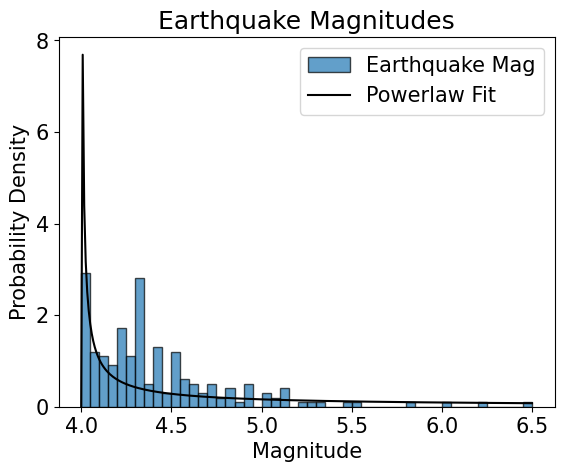

In [55]:

# Fit powerlaw distribution to the winning times (in seconds)
earthquake_powerlaw_fit = fit_powerlaw_distribution(earthquake_magnitudes)


# Plot the hist of the running times
plt.hist(earthquake_magnitudes,
         bins=50,
         edgecolor='black',
         density=True,
         label="Earthquake Mag", alpha=.7
         )


# Plot the fitted Gumbel distribution
x_earth = np.linspace(*earthquake_powerlaw_fit.interval(0.9999), 300)
plt.plot(x_earth, earthquake_powerlaw_fit.pdf(x_earth), 'k', label='Powerlaw Fit')


plt.xlabel('Magnitude')
plt.ylabel('Probability Density')
plt.title('Earthquake Magnitudes')

plt.legend();

Generally, the powerlaw distribution seems to do a decent job at fitting the data on the earthquake magnitudes. It makes sense for there to be a right tail as more extreme magnitudes are less likely than ones around 4.0.



##Problem 3

In [56]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

In [57]:
DATA_PATH = 'Harvard-AM115-2024/Homework/HW2/'
with open(DATA_PATH+'HW2-rowing_data.csv') as fh:
    rowing_data = pd.read_csv(fh)

In [58]:
rowing_data

rowers_in_boat      time         competition
0                8  5.367333       Tokyo olympic
1                8  5.406833         2022 worlds
2                8  5.398667  2023 world cup III
3                8  5.311333     world best time
4                4  5.712667       Tokyo olympic
5                4  5.804833         2022 worlds
6                4  5.824500  2023 world cup III
7                4  5.631000     world best time
8                2  6.254833       Tokyo olympic
9                2  6.467667         2022 worlds
10               2  6.414667  2023 world cup III
11               2  6.141667     world best time
12               1  6.675000       Tokyo olympic
13               1  6.811167         2022 worlds
14               1  6.710000  2023 world cup III
15               1  6.511667     world best time

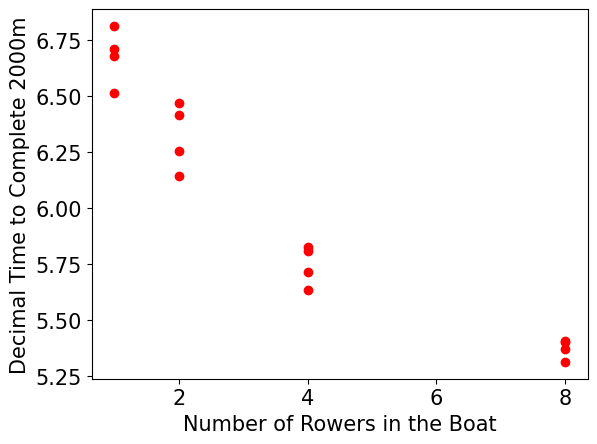

In [59]:
plt.scatter(rowing_data['rowers_in_boat'], rowing_data['time'], color='red')

plt.xlabel('Number of Rowers in the Boat')
plt.ylabel('Decimal Time to Complete 2000m');

**3a**:

In [60]:
# Define the power law function
def power_law(N, a, b):
    return a * np.power(N, b)

In [61]:
from scipy.optimize import curve_fit
# Fit the power law function to the data

x = rowing_data['rowers_in_boat'].values
y = rowing_data['time'].values

### ... fit function to data and compare exponents
vals, _ = curve_fit(power_law, x, y)

# Extract the exponent
exponent = vals[1]

# Compare with McMahon's theory prediction
mcmahon_exponent = -1/9

print("Exponent from data:", exponent)
print("Exponent predicted by McMahon's theory:", mcmahon_exponent)


Exponent from data: -0.10742487850566827
Exponent predicted by McMahon's theory: -0.1111111111111111


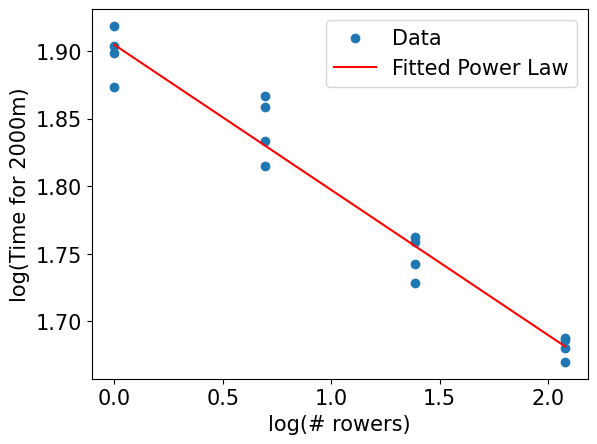

In [62]:
# Plot the data points and the fitted power law curve
# SUGGESTION: plot the log of both x and y, you should see a line with coeff ~ -1/9
# ...
# Plot the data points
plt.scatter(np.log(x), np.log(y), label='Data')

# Plot the fitted power law curve
x_vals = np.linspace(min(x), max(x), 100)
plt.plot(np.log(x_vals), np.log(power_law(x_vals, *vals)), 'r-', label='Fitted Power Law')

plt.xlabel('log(# rowers)')
plt.ylabel('log(Time for 2000m)')
plt.legend()
plt.show()

From this analysis we see that our estimated exponent from the power law is very close to the McMahon $N^{-1/9}$ law!

**3b**: There are many factors in a boat race that can affect the basic argument. For instance, the number of participants, the trainin they had, the strategies used during racing, and the course layout could potentially influence our analysis.

##Problem 4

1. When, if ever, will Facebook contain more dead people than alive people?

From a simple Google search, we estimate the current global population to be about 8 trillion people, the rate of Facebook users (which we will assume to be a constant rate) to be 0.398 and the mortality rate (which we will also assume to be a constant rate) to be 7.7/1000. Putting all of this information together we get:

Current number of users: $8 * 10^9 * 0.398 = 3.2 * 10^9$

Number of dead users per year: $\frac{7.7}{1000} * 0.398 * 8 * 10^9 = 2.5 * 10^7$

So,

$3.2 * 10^9$ current users / $2.5*10^7$ dead users/year = 126.36 years. Therefore, in about 126 years from now, the number of dead users will outnumber the alive ones.


2. How many airplanes are currently in the sky?

First we consider the types of flights that happen daily: cargo, commercial, military, and private jet and provide estimations of the amount that occurs each day. For cargo, we can estimate there are 5000 flights, commercial about 9000, military and private about 1000. Adding them together, we would get: $5000 + 9000 + 1000 = 15,000$ airplanes in the sky right now.

## Problem 5

**5.1a**

Following the derivation in lecture, we start out with the following equation:

$p(x,t+\tau) = 1/4*p(x-a, t) + 1/3*p(x+a, t) + 5/12*p(x,t)$

Using the Taylor Series, we have:


*   $p(x, t+\tau) ≈ p(x,t) + \tau  \frac{\partial p}{\partial t}$
*   $p(x \pm a, t) \approx p(x,t) \pm a \frac{\partial p}{\partial x} + \frac{a^2}{2} \frac{\partial ^2p}{\partial x^2} + T$

Where $T$ represents the rest of the terms that are not relevant to this problem. Plugging these equations into our original and simplifying, we get:

$p(x,t+\tau) = p(x,t) + \tau  \frac{\partial p}{\partial t} = 5/12 * p(x,t) + 1/3[p(x,t) + a \frac{\partial p}{\partial x} + \frac{a^2}{2} \frac{\partial ^2p}{\partial x^2} + T] + 1/4[p(x,t) - a \frac{\partial p}{\partial x} + \frac{a^2}{2} \frac{\partial ^2p}{\partial x^2} + T]$

$\tau \frac{\partial p}{\partial t} = (1/4 - 1/3) a\frac{\partial p}{\partial x} + \frac{7a^2}{24} \frac{\partial ^2p}{\partial x^2}$

Therefore, the advection speed is the coeff of the first derivative which is $\frac{-a}{12\tau}$ and the diffusion constant is the coeff of the second derivative which is $\frac{7a^2}{24\tau}$.



**5.1b**

In [63]:
import numpy as np
import scipy

# Fixing random state for reproducibility
np.random.seed(0)

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})


import matplotlib.animation as animation
from IPython.display import HTML

In [64]:
def Gen_Randwalk(n_steps=100, delta=1, p=(1/3,5/12,1/4)):

    deltas = [-delta, 0, delta]

    # initialize
    walkData = np.empty(n_steps)
    walkData[0] = np.random.rand()

    # Creating the next steps.
    for t in range(1, n_steps):

        #choose direction
        step = np.random.choice(deltas, p=p)

        #update walker position
        walkData[t] = walkData[t - 1] + step

    return walkData

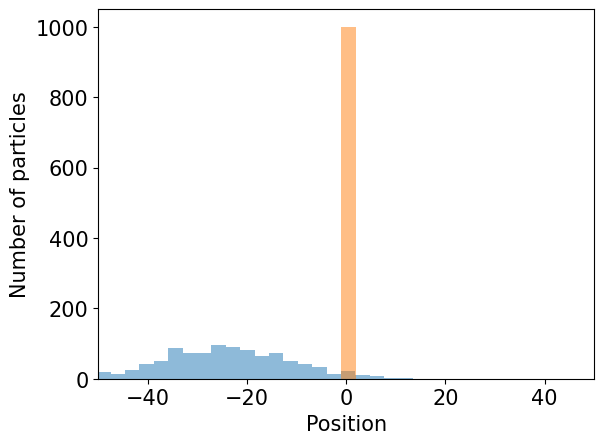

In [65]:
# Show how position distribution changes in time
# Crate 50 particles, each runs 300 steps
N=300
n_particles = 1000 # many more particles for better statistics

trajectories = np.array([Gen_Randwalk(N) for i in range(n_particles)])



fig2,ax = plt.subplots()

def init():
    ax.set_xlim(-50,50)
    plt.hist(trajectories[:,1] ,bins=1, alpha=.5)

    plt.xlabel('Position')
    plt.ylabel('Number of particles')



def update(frame):
    plt.cla()
    plt.xlim(-50,50)
    plt.hist(trajectories[:,frame], bins=int(frame/10)+1, alpha=.5)

    plt.xlabel('Position')
    plt.ylabel('Number of particles')



ani = animation.FuncAnimation(fig2,update,frames=range(N),init_func=init)
HTML(ani.to_jshtml())

In [66]:
# theoretical standard deviation after n steps
def rw_std(n, delta=1):
    return delta * np.sqrt(n)

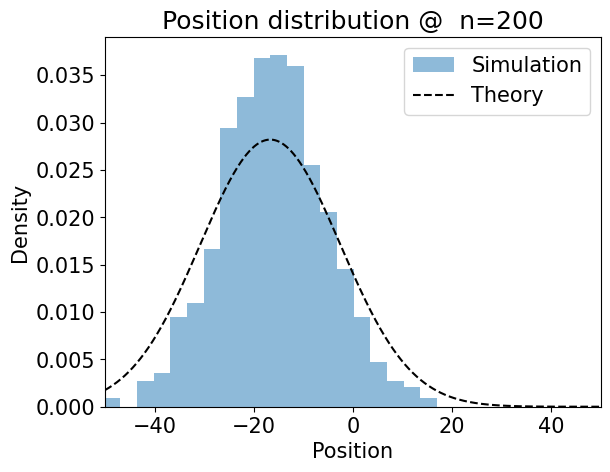

In [67]:
n=200

plt.hist(trajectories[:,n], bins=int(n/10)+1, density=True, alpha=.5, label='Simulation')

x = np.linspace(-50,50,1000)
y = scipy.stats.norm.pdf(x, loc=(-n*1/12), scale=rw_std(n))
plt.plot(x, y, 'k--', label='Theory')

plt.xlim(-50,50)
plt.xlabel('Position')
plt.ylabel('Density')

plt.title('Position distribution @  n=%d' % n)

plt.legend();

We see that our theorectical distribution aligns with our simulated distribution!

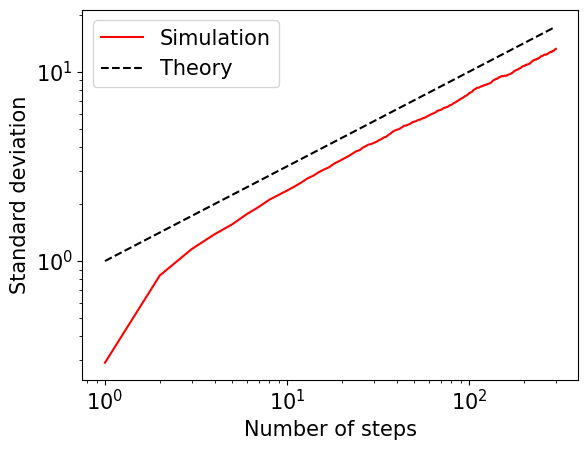

In [68]:
steps=np.arange(1, N)

# Calculate width of distribution
data_std = np.std(trajectories, axis=0)

plt.plot(np.arange(1, N+1), data_std, 'r', label='Simulation')
plt.plot(steps, rw_std(steps), 'k--', label='Theory')

plt.xlabel('Number of steps')
plt.ylabel('Standard deviation')

plt.xscale('log')
plt.yscale('log')

plt.legend();

**5.2**

1. Cross-section of the cake before it was baked:
![picture](https://drive.google.com/uc?export=view&id=1gg3Wx09mD3GFitZtPvaL3ZMUN4wiE7lO)


2. Temperature distribution of the cake after 10 minutes:
![picture](https://drive.google.com/uc?export=view&id=1vSpcIjkDj9FjTeyEhlyetYwbxZn7o3bq)



3. Estimation of the transition temperature:
![picture](https://drive.google.com/uc?export=view&id=1Sq_1E890kp0E6_QbqSi1S6kagxybcoNT)


First, in blue, I averaged over the temperatures measured in the center, center-edge, and the edge for each row. Then, at each value of L in the second table, I estimate the temperature at that value to correspond to the averaged blue values. So my estimation of the transition temperature will be the average of the blue values:

$\frac{22.2+60.3+72.3+98.1+97.7}{4} = 87.65$





**5.3**:

*Hypothesis*: The crust thickness in the cake is not uniform due to the difference in temperature in the oven. That is, the temperature distribution in the oven might be inconsistent where a part of a cake is exposed to hotter part of the oven than the other parts.

We consider the results from the Cook My Meat calculator:

![picture](https://drive.google.com/uc?export=view&id=1UIuBgTNtQ901wC2Xc4eelDhbUqVlvg5t)

Let the temperature of the pan and the time in which one side of the steak meets the pan simulate the cake in the oven. Here we see that when one side of the steak is cooked at a different temperature than the other side, we see that the thickness of the meat varies and it seems to take longer for the heat to reach the middle of the steak. This tells us that the difference in temperature affects the thickness of the meat. However, if we cook both sides of the meat using the same exact temperature (i.e., keeping it uniform), we see that the thickness of the meat is consistent and symmetrical (both sides of the steak have equal thickness where starting from the center it is medium to well-cooked). See the figure below to illustrate this idea.

![picture](https://drive.google.com/uc?export=view&id=1fAXPxKY84hA_1LXU0dVuiIei6G5gxCMN)

Furthermore, we see that the thickness of the steak is very similar to the L values that we measured in the lab at different time stamps and at different temperatures. Generally, we see that the L increases with temperature over the period of 12 minutes.